In [7]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

In [1]:
#get current working directory
import os
cwd = os.getcwd()
print(cwd)

C:\Users\maxel\Desktop\DataCarp\Org\data-exploration\automation\code


In [2]:
os.listdir()

['.ipynb_checkpoints', 'automation.ipynb']

### Load Data

In [ ]:
#cleaned_data_locatoin = 'data/gapminder_cleaned.csv'
#df = pd.read_csv(cleaned_data_location)
#df.head()

In [12]:
VERBOSE = False

cleaned_data_location = '../data/gapminder_cleaned.csv'
try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
except FileNotFoundError:
        print('Could not find data file, check path? You tried', cleaned_data_location)


In [14]:
years = df['year'].unique()
years.sort()
assert years[-1] == 2007
assert years[0] == 1952

### Refactoring

In [17]:
#mean life expectancy in asia from 1952 to 2007
mask_asia = df['continent'] == 'asia'
df_asia = df[mask_asia] #make list a data frame

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]
value = np.mean(df_1952['lifeexp'])

if VERBOSE:
    print('mean for 1952 is ', value)

#initialize empty
result = []

#add
result.append(('asia','1952',value)) #tuple a list that cannot be modified
result = pd.DataFrame(result, columns=['continent','year','lifeexp'])

In [18]:
result

,continent,year,lifeexp
0,asia,1952,46.314394


In [20]:
#get all years in data set

#mean life expectancy in asia from 1952 to 2007
mask_asia = df['continent'] == 'asia'
df_asia = df[mask_asia] #make list a data frame

years = df_asia['year'].unique()
summary = []

#mean lifeexp by year
for year in years:
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia',year, value))
    
summary = pd.DataFrame(summary, columns=['continent','year','lifeexp'])


In [24]:
df['continent'].tail()

1699    africa
1700    africa
1701    africa
1702    africa
1703    africa
Name: continent, dtype: object

In [38]:
#get all years from continent in data set
continent_name = 'africa'

#mean life expectancy in continent from 1952 to 2007
mask_cont = df['continent'] == continent_name
df_cont = df[mask_cont] #make list a data frame

years = df_cont['year'].unique()
summary = []

#mean lifeexp by year
for year in years:
    mask_year = df_cont['year'] == year
    df_year = df_cont[mask_year]
    value = round(np.mean(df_year['lifeexp']))
    summary.append((continent_name,year, value))c
    
summary = pd.DataFrame(summary, columns=['continent','year','meanlifeexp'])


In [39]:
summary

,continent,year,meanlifeexp
0,africa,1952,39
1,africa,1957,41
2,africa,1962,43
3,africa,1967,45
4,africa,1972,47
5,africa,1977,50
6,africa,1982,52
7,africa,1987,53
8,africa,1992,54
9,africa,1997,54


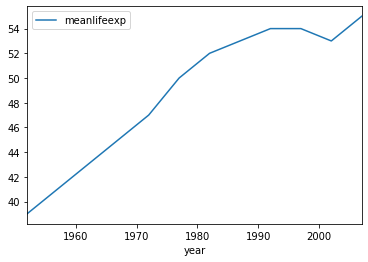

In [42]:
summary.plot.line('year',label='mean life expectancy')

In [38]:
#get all years from continent in data set
continent_name = 'africa'

#mean life expectancy in continent from 1952 to 2007
mask_cont = df['continent'] == continent_name
df_cont = df[mask_cont] #make list a data frame

years = df_cont['year'].unique()
summary = []

#mean lifeexp by year
for year in years:
    mask_year = df_cont['year'] == year
    df_year = df_cont[mask_year]
    value = round(np.mean(df_year['lifeexp']))
    summary.append((continent_name,year, value))c
    
summary = pd.DataFrame(summary, columns=['continent','year','meanlifeexp'])


### Functions

In [46]:
('a','b','c')+('d','e','f')

('a', 'b', 'c', 'd', 'e', 'f')

In [52]:
def calculate_mean_over_time(df,category,continent_name, verbose=False):
    #mean life expectancy in continent from 1952 to 2007
    mask_cont = df['continent'] == continent_name
    df_cont = df[mask_cont] #make list a data frame

    years = df_cont['year'].unique()
    summary = []

    #mean category by year
    for year in years:
        if verbose:
            print(year.head())
        mask_year = df_cont['year'] == year
        df_year = df_cont[mask_year]
        value = round(np.mean(df_year[category]))
        summary.append((continent_name,year, value))

    summary = pd.DataFrame(summary, columns=['continent','year','mean'+category])
    return summary

In [54]:
VERBOSE = False
calculate_mean_over_time(df,'pop','europe',VERBOSE)

,continent,year,meanpop
0,europe,1952,13937362
1,europe,1957,14596345
2,europe,1962,15345172
3,europe,1967,16039299
4,europe,1972,16687835
5,europe,1977,17238818
6,europe,1982,17708897
7,europe,1987,18103139
8,europe,1992,18604760
9,europe,1997,18964805


### Passing functions

In [71]:
df.columns

Index(['year', 'pop', 'lifeexp', 'gdppercap', 'country', 'continent'], dtype='object')

In [84]:
def calculate_func_over_time(df,category,continent_name, func, verbose=False):
    """Calculates values of a statistic function over time
    
    Args:
        df: A pandas DataFrame
        category: one of the column headers in your DataFrame df (e.g. 'lifeexp')
        continent_name: value from continent column in df (e.g. 'asia')
        func: a function applied to df column
        verbose: (optional arg, default(False)) show debugging output
        
    Returns:
        a summary table of value per year as DataFrame
    
    """
    #check the values provided
    assert category in df.columns.values
    assert continent_name in df['continent'].unique()
    
    #mask continent_name
    mask_cont = df['continent'] == continent_name
    df_cont = df[mask_cont] #make list a data frame
    #get year list (unique)
    years = df_cont['year'].unique()
    summary = []

    #mean category by year
    for year in years:
        if verbose:
            print(year.head())
        mask_year = df_cont['year'] == year
        df_year = df_cont[mask_year]
        value = round(func(df_year[category]))
        summary.append((continent_name,year, value))

    summary = pd.DataFrame(summary, columns=['continent','year',func.__name__+category])
    return summary


In [95]:
calculate_func_over_time(df,'lifeexp','asia',np.mean)['year']

0     1952
1     1957
2     1962
3     1967
4     1972
5     1977
6     1982
7     1987
8     1992
9     1997
10    2002
11    2007
Name: year, dtype: int64

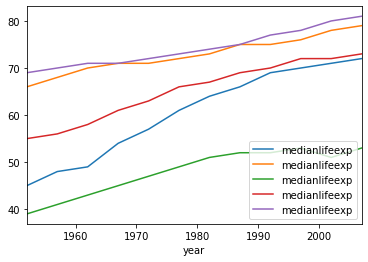

In [93]:
continents = df['continent'].unique()
VERBOSE = False
fig, ax = plt.subplots()

for continent in continents:
    output = calculate_func_over_time(df,'lifeexp',continent, np.median)
    output.plot.line('year',ax=ax, label=continent)

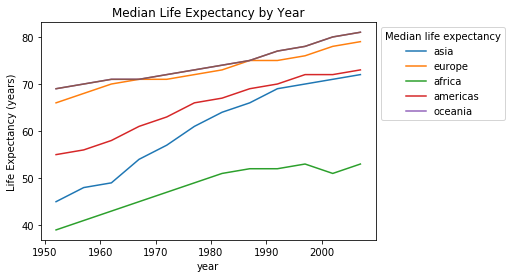

In [130]:
continents = df['continent'].unique()
VERBOSE = False
ax = plt.axes()

for continent in continents:
    #run closing arguments(;) for last plot
    if continent == continents[-1]:
        output = calculate_func_over_time(df,'lifeexp',continent, np.median)
        plt.plot(output['year'], output[np.median.__name__+'lifeexp'], label=continent)
        ax.set(title='Median Life Expectancy by Year',
               xlabel = 'year',
               ylabel = 'Life Expectancy (years)')
        plt.legend(title='Median life expectancy',loc='upper right',bbox_to_anchor=(1.4, 1.0));
    #plots before last plot
    output = calculate_func_over_time(df,'lifeexp',continent, np.median)
    plt.plot(output['year'], output[np.median.__name__+'lifeexp'], label=continent)
    

In [ ]:
#import function file that exists in current directory
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
from automation import calculate_func_over_time
%matplotlib inline

In [ ]:
#expand search path
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
scriptpath = '<directory where your function file(s) exist>'
sys.path.append(scriptpath)
from automation import calculate_func_over_time
%matplotlib inline